<a href="https://colab.research.google.com/github/leedongkt/computervision/blob/main/9%EC%A3%BC%EC%B0%A8CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실습 1번

import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()   #2차원 구조로 변환
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()   # 모델 선택 (신경망 구조 설계임 )
cnn.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(16, (5, 5), padding='valid', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(120, (5, 5), padding='valid', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) #학습
cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res = cnn.evaluate(x_test, y_test, verbose=0)   # 예측
print(f"정확률 = {res[1] * 100}")


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/30
469/469 - 41s - loss: 0.3107 - accuracy: 0.9074 - val_loss: 0.0902 - val_accuracy: 0.9724 - 41s/epoch - 88ms/step
Epoch 2/30
469/469 - 32s - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.0554 - val_accuracy: 0.9823 - 32s/epoch - 67ms/step
Epoch 3/30
469/469 - 32s - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0473 - val_accuracy: 0.9849 - 32s/epoch - 68ms/step
Epoch 4/30
469/469 - 33s - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0407 - val_accuracy: 0.9857 - 33s/epoch - 70ms/step
Epoch 5/30
469/469 - 31s - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0394 - val_accuracy: 0.9883 - 31s/epoch - 65ms/step
Epoch 6/30
469/469 - 31s - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0378 - val_accuracy: 0.9879 - 31s/epoch - 67ms/step
Epoch 7/30
469/469 - 32s - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0390 - val_accuracy: 0.9878 - 32s/epoch - 68ms/step
Epoch 8/30
469/469 - 31s - loss: 0.0266 - accuracy: 0.9917 -

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/100
391/391 - 13s - loss: 1.6112 - accuracy: 0.4077 - val_loss: 1.2796 - val_accuracy: 0.5408 - 13s/epoch - 34ms/step
Epoch 2/100
391/391 - 4s - loss: 1.2376 - accuracy: 0.5572 - val_loss: 1.0909 - val_accuracy: 0.6120 - 4s/epoch - 10ms/step
Epoch 3/100
391/391 - 4s - loss: 1.0777 - accuracy: 0.6197 - val_loss: 1.0274 - val_accuracy: 0.6355 - 4s/epoch - 11ms/step
Epoch 4/100
391/391 - 4s - loss: 0.9549 - accuracy: 0.6645 - val_loss: 0.8686 - val_accuracy: 0.6907 - 4s/epoch - 10ms/step
Epoch 5/100
391/391 - 4s - loss: 0.8726 - accuracy: 0.6942 - val_loss: 0.7994 - val_accuracy: 0.7130 - 4s/epoch - 11ms/step
Epoch 6/100
391/391 - 4s - loss: 0.8136 - accuracy: 0.7153 - val_loss: 0.7714 - val_accuracy: 0.7296 - 4s/epoch - 11ms/step
Epoch 7/100
391/391 - 4s - loss: 0.7661 - accuracy: 0.7309 - val_loss: 0.7365 - val_accuracy: 0.7436 - 4s/epoch - 10ms/step
Epoch 8/100
391/391 - 4s - loss: 0.7261 - accuracy: 0.7437 - va

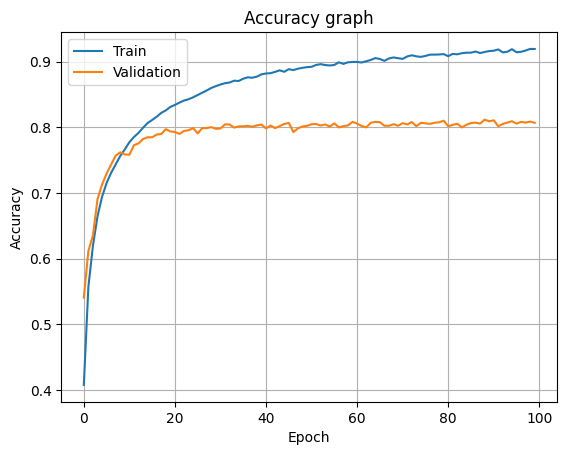

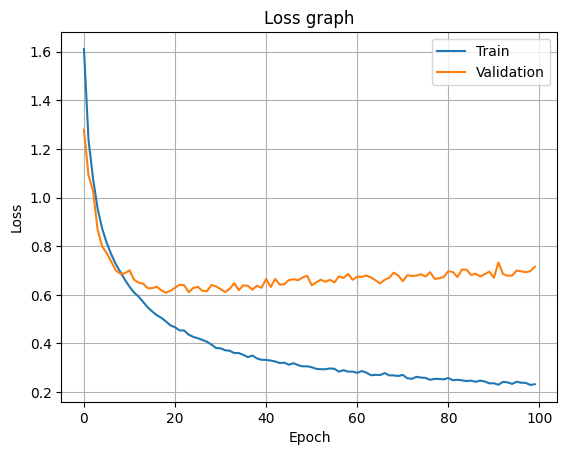

In [ ]:
# 실습 2
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), verbose=2)
res = cnn.evaluate(x_test, y_test, verbose=0)
print(f"정확률 = {res[1] * 100}")

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()




In [ ]:
#실습3

import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), verbose=2)

cnn.save('cnn_v2.h5')

res = cnn.evaluate(x_test, y_test, verbose=0)
print(f"정확률 = {res[1] * 100}")

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
469/469 - 7s - loss: 0.2242 - accuracy: 0.9281 - val_loss: 0.0421 - val_accuracy: 0.9866 - 7s/epoch - 15ms/step
Epoch 2/100
469/469 - 4s - loss: 0.0649 - accuracy: 0.9800 - val_loss: 0.0317 - val_accuracy: 0.9900 - 4s/epoch - 8ms/step
Epoch 3/100
469/469 - 4s - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0224 - val_accuracy: 0.9928 - 4s/epoch - 8ms/step
Epoch 4/100
469/469 - 4s - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0188 - val_accuracy: 0.9937 - 4s/epoch - 8ms/step
Epoch 5/100
469/469 - 4s - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0223 - val_accuracy: 0.9930 - 4s/epoch - 8ms/step
Epoch 6/100
469/469 - 4s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0211 - val_accuracy: 0.9935 - 4s/epoch - 8ms/step
Epoch 7/100
469/469 - 4s - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0195 - val_accuracy: 0.9939 - 4s/epoch - 8ms/step
Epoch 8/100
469/469 - 4s - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


정확률 = 99.61000084877014


<ipython-input-4-f7d6529912f2>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


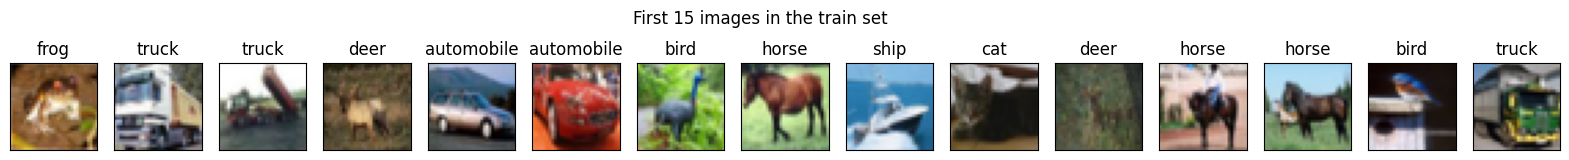

<ipython-input-4-f7d6529912f2>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


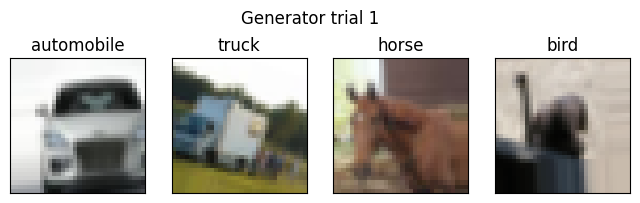

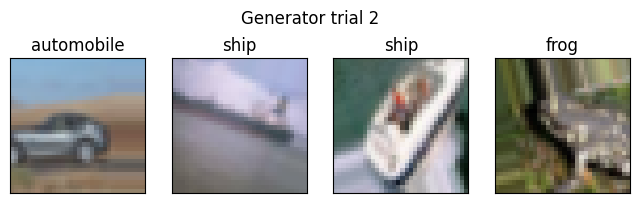

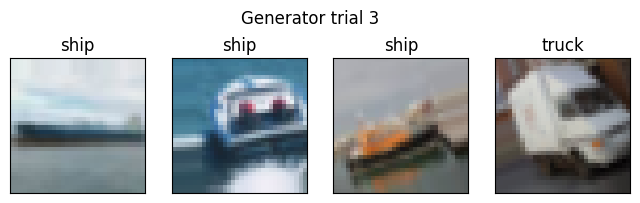

In [ ]:
#실습 4

import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 2))
plt.suptitle('First 15 images in the train set')
for i in range(15):
    plt.subplot(1, 15, i + 1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

batch_size = 4
generator = ImageDataGenerator(
    rotation_range=20.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
gen = generator.flow(x_train, y_train, batch_size=batch_size)

for a in range(3):
    img, label = gen.next()
    plt.figure(figsize=(8, 2.4))
    plt.suptitle('Generator trial ' + str(a + 1))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i + 1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

1/1 [==============================] - 1s 1s/step
예측 결과: [('n02325366', 'wood_rabbit', 0.7427542), ('n02326432', 'hare', 0.24023649), ('n02328150', 'Angora', 0.008815723), ('n01877812', 'wallaby', 0.0026892489), ('n02356798', 'fox_squirrel', 0.0012279322)]


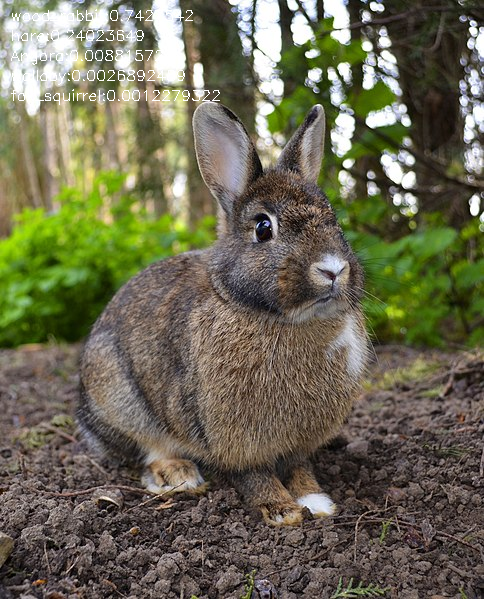

In [ ]:
#실습 5

import cv2

from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img = cv2.imread('rabbit.jpg')
x = np.reshape(cv2.resize(img, (224, 224)), (1, 224, 224, 3))
x = preprocess_input(x)

preds = model.predict(x)
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

for i in range(5):
    cv.putText(img, top5[i][1] + ":" + str(top5[i][2]), (10, 20 + i * 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import pathlib
import os

data_path=pathlib.Path('datasets/stanford_dogs/images/images')
data_path.mkdir(parents=True, exist_ok=True)

print(f"Directort creaded : {data_path}")

Directort creaded : datasets/stanford_dogs/images/images


In [ ]:
# 실습 6
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

data_path = pathlib.Path('datasets/stanford_dogs/images/images')

train_ds = image_dataset_from_directory(data_path, validation_split=0.2, subset='training', seed=123, image_size=(224, 224), batch_size=16)
test_ds = image_dataset_from_directory(data_path, validation_split=0.2, subset='validation', seed=123, image_size=(224, 224), batch_size=16)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

cnn = Sequential()
cnn.add(Rescaling(1.0/255.0))  # 입력 텐서를 0.0 ~ 1.0으로 정규화
cnn.add(base_model)
cnn.add(Flatten())  # 백본 출력 텐서를 1차원으로 flattening
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(120, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])
hist = cnn.fit(train_ds, epochs=200, validation_data=test_ds, verbose=2)

print('정확률 =', cnn.evaluate(test_ds, verbose=0)[1] * 100)
cnn.save('cnn_for_stanford_dogs.h5')

import pickle
f = open('dog_species_names.txt', 'wb')
pickle.dump(train_ds.class_names, f)
f.close()

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory datasets/stanford_dogs/images/images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
#실습7
import cv2 as cv
import numpy as np
import tensorflow as tf
import winsound
import pickle
import sys
from PyQt5.QtWidgets import *

cnn = tf.keras.models.load_model('cnn_for_stanford_dogs.h5')
dog_species = pickle.load(open('dog_species_names.txt', 'rb'))

class DogSpeciesRecognition(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('강아지 인식')
        self.setGeometry(200, 200, 700, 100)

        fileButton = QPushButton('강아지 사진 읽기', self)
        recognitionButton = QPushButton('강아지 인식', self)
        quitButton = QPushButton('종료', self)

        fileButton.setGeometry(10, 10, 100, 30)
        recognitionButton.setGeometry(110, 10, 100, 30)
        quitButton.setGeometry(510, 10, 100, 30)

        fileButton.clicked.connect(self.pictureOpenFunction)
        recognitionButton.clicked.connect(self.recognitionFunction)
        quitButton.clicked.connect(self.quitFunction)

    def pictureOpenFunction(self):
        fname = QFileDialog.getOpenFileName(self, '강아지 사진 읽기', '/')
        self.img = cv.imread(fname[0])
        if self.img is None:
            sys.exit('파일을 찾을 수 없습니다.')
        cv.imshow('Dog image', self.img)

    def recognitionFunction(self):
        x = np.reshape(cv.resize(self.img, (224, 224)), (1, 224, 224, 3))
        res = cnn.predict(x)
        top5 = np.argsort(res[0])[-5:]
        top5_species = [dog_species[i] for i in top5]
        for i in range(5):
            prob = '{:.2f}'.format(res[0][top5[i]] * 100)
            name = str(top5_species[i]).split('.')[-1]
            cv.putText(self.img, prob + '%: ' + name, (10, 100 + i * 30), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv.imshow('Dog image', self.img)
        winsound.Beep(1000, 500)

    def quitFunction(self):
        cv.destroyAllWindows()
        self.close()

app = QApplication(sys.argv)
win = DogSpeciesRecognition()
win.show()
app.exec_()


ModuleNotFoundError: No module named 'winsound'